<a href="https://colab.research.google.com/github/pvlakshm/AIML/blob/main/Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Distance based ML models treat features like geometric coordinates.
# In distance-based ML models (e.g., k-NN, k-Means, etc.), each feature
# of a sample is treated as if it were a coordinate in a geometric space.
# A sample with n features is represented as a point in an n-dimensional
# space. Distances between these points determine similarity or closeness.
# The algorithm's behavior (who is a neighbor, which cluster does a point
# belongs to, etc.) is entirely governed by these distances.
#
# All that is fine, until the "coordinates" are not on the same scale.
# If the features are not on the same scale, the distance metric will be
# dominated by the feature with the largest scale, leading to misleading
# results. Fr e.g., the distance between (0, 0) and (100000, 0) is almost
# the same as the distance between (0, 1) and (100000, 0). The change in
# 0 to 1 hardly affects the distance!
# 
# But these are NOT geometric coordinates, they are features and changes in
# their values must be meaningfully reflected in the distance calculations.
# We want the distance between (0, 0) and (100000, 0) to be appropriatly different
# from the distance between (0, 1) and (100000, 0).
#
# And we can achieve that by scaling the features.
#
# The goal of this exercise is to demonstrate the effect of feature scaling. Note
# how the distance between the query point and the training samples changes when
# the features are scaled. When using distance-weighted models, this can potentially
# change the predictions significantly.

import numpy as np

X = np.array([
    # HP,  Price
    [140,  20000],
    [142,  22000],
    [145,  34000],
    [185, 120000],
    [200, 150000],
])

# Query point
x_new = np.array([[150, 100000]])

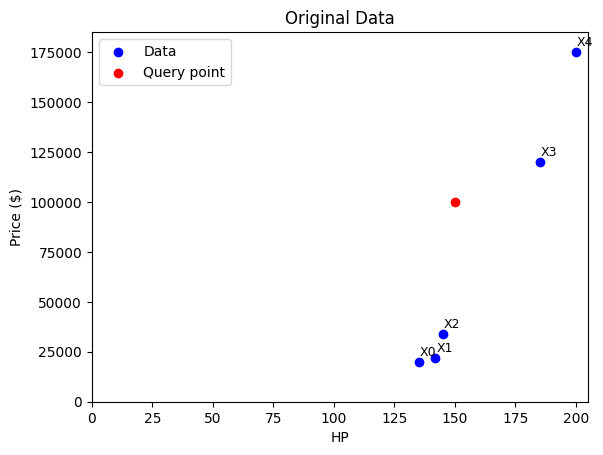

Distances before scaling:
x_new → X[0]: 80000.00
x_new → X[1]: 78000.00
x_new → X[2]: 66000.00
x_new → X[3]: 20000.03
x_new → X[4]: 75000.02

Nearest neighbor BEFORE scaling: X[3]


In [38]:
# -------------------------------
# Plot original data
# -------------------------------
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c = 'blue', label = 'Data')
for i, (x, y) in enumerate(X):
    plt.text(x+0.3, y+3000, f"X{i}", fontsize = 9)
plt.scatter(x_new[:, 0], x_new[:, 1], c = 'red', marker = 'o', label = 'Query point')
plt.xlabel("HP")
plt.ylabel("Price ($)")
plt.title("Original Data")
# force axes to start at (0, 0)
plt.xlim(0, max(np.max(X[:, 0]), x_new[0, 0]) + 5)
plt.ylim(0, max(np.max(X[:, 1]), x_new[0, 1]) + 10000)
plt.legend()
plt.show()

# -------------------------------
# Distances before scaling
# -------------------------------
d1 = np.sqrt((X[0, 0] - x_new[0, 0])**2 + (X[0, 1] - x_new[0, 1])**2)
d2 = np.sqrt((X[1, 0] - x_new[0, 0])**2 + (X[1, 1] - x_new[0, 1])**2)
d3 = np.sqrt((X[2, 0] - x_new[0, 0])**2 + (X[2, 1] - x_new[0, 1])**2)
d4 = np.sqrt((X[3, 0] - x_new[0, 0])**2 + (X[3, 1] - x_new[0, 1])**2)
d5 = np.sqrt((X[4, 0] - x_new[0, 0])**2 + (X[4, 1] - x_new[0, 1])**2)

distances_before = [d1, d2, d3, d4, d5]

print("Distances before scaling:")
for i, d in enumerate(distances_before):
    print(f"x_new → X[{i}]: {d:.2f}")

# -------------------------------
# Show nearest neighbors before scaling
# -------------------------------
nn_before = np.argmin(distances_before)
print(f"\nNearest neighbor BEFORE scaling: X[{nn_before}]")

In [39]:
# -------------------------------
# Apply StandardScaler
# -------------------------------
from sklearn.preprocessing import StandardScaler

scaler       = StandardScaler()
X_scaled     = scaler.fit_transform(X)
x_new_scaled = scaler.transform(x_new)

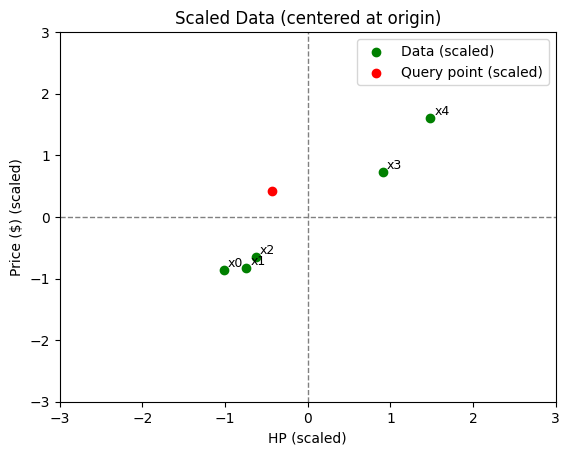


Distances after scaling:
x_new_scaled → X_scaled[0]: 1.40
x_new_scaled → X_scaled[1]: 1.29
x_new_scaled → X_scaled[2]: 1.07
x_new_scaled → X_scaled[3]: 1.38
x_new_scaled → X_scaled[4]: 2.26

Nearest neighbor AFTER scaling : X[2]


In [40]:
# -------------------------------
# Plot scaled data
# -------------------------------
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = 'green', label = 'Data (scaled)')
plt.scatter(x_new_scaled[:, 0], x_new_scaled[:, 1], c = 'red', marker = 'o', label = 'Query point (scaled)')
for i, (x, y) in enumerate(X_scaled):
    plt.text(x+0.05, y+0.05, f"x{i}", fontsize=9)
plt.axhline(0, color = 'gray', linestyle = '--', linewidth = 1)
plt.axvline(0, color = 'gray', linestyle = '--', linewidth = 1)
plt.xlabel("HP (scaled)")
plt.ylabel("Price ($) (scaled)")
plt.title("Scaled Data (centered at origin)")
plt.legend()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

# -------------------------------
# Distances after scaling
# -------------------------------
d1s = np.sqrt((X_scaled[0, 0] - x_new_scaled[0, 0])**2 + (X_scaled[0, 1] - x_new_scaled[0, 1])**2)
d2s = np.sqrt((X_scaled[1, 0] - x_new_scaled[0, 0])**2 + (X_scaled[1, 1] - x_new_scaled[0, 1])**2)
d3s = np.sqrt((X_scaled[2, 0] - x_new_scaled[0, 0])**2 + (X_scaled[2, 1] - x_new_scaled[0, 1])**2)
d4s = np.sqrt((X_scaled[3, 0] - x_new_scaled[0, 0])**2 + (X_scaled[3, 1] - x_new_scaled[0, 1])**2)
d5s = np.sqrt((X_scaled[4, 0] - x_new_scaled[0, 0])**2 + (X_scaled[4, 1] - x_new_scaled[0, 1])**2)

distances_after = [d1s, d2s, d3s, d4s, d5s]

print("\nDistances after scaling:")
for i, d in enumerate(distances_after):
    print(f"x_new_scaled → X_scaled[{i}]: {d:.2f}")

# -------------------------------
# Show nearest neighbor after scaling
# -------------------------------
nn_after  = np.argmin(distances_after)
print(f"\nNearest neighbor AFTER scaling : X[{nn_after}]")